## HR Data

This notebook is about showing the particularities of an HR dataset. I focus my analysis in exploring the differences between Female and Male in the workplace.
The data for this notebook was found in Kaggle: https://www.kaggle.com/krismurphy01/data-lab

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV



In [58]:
# import excel file
df = pd.read_csv('HR_Engagement.csv')
df.shape

(14999, 62)

In [56]:
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),salary_category
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,1,5,1841,61,9,1
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,1,3,2,5,1,5,1990,90,8,1
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,5,2,2,4,4,4,3193,80,8,2
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,1,1,2,4,4,1,3248,77,6,0
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,3,5,1,2,5,4,3149,80,10,1


In [59]:
df.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,...,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,...,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4893.000000,85.000000,8.000000
max,14999.000000,1.0,1.000000,1.0,3.0,6.0,6.0,1.000000,3.0,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8500.000000,90.000000,10.000000


In [5]:
df.columns

Index(['ID', 'Name', 'Department', 'GEO', 'Role', 'Rising_Star',
       'Will_Relocate', 'Critical', 'Trending Perf', 'Talent_Level',
       'Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_OnPrem_1',
       'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4',
       'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2',
       'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5',
       'EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3',
       'EMP_Engagement_4', 'EMP_Engagement_5', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left_Company', 'CSR Factor', 'promotion_last_5years',
       'sales', 'salary', 'Gender', 'LinkedIn_Hits', 'Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5',
       'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title', 'Women_Leave',
       'Men_Leave', 'Emp_Competitive_1', 'Emp_Competitive_2',
       'Emp_Competitive_3',

In [27]:
df.dtypes

ID                                         int64
Name                                      object
Department                                object
GEO                                       object
Role                                      object
Rising_Star                              float64
Will_Relocate                              int64
Critical                                 float64
Trending Perf                              int64
Talent_Level                               int64
Validated_Talent_Level                     int64
Percent_Remote                           float64
EMP_Sat_OnPrem_1                         float64
EMP_Sat_OnPrem_2                         float64
EMP_Sat_OnPrem_3                         float64
EMP_Sat_OnPrem_4                         float64
EMP_Sat_OnPrem_5                         float64
EMP_Sat_Remote_1                           int64
EMP_Sat_Remote_2                           int64
EMP_Sat_Remote_3                           int64
EMP_Sat_Remote_4    

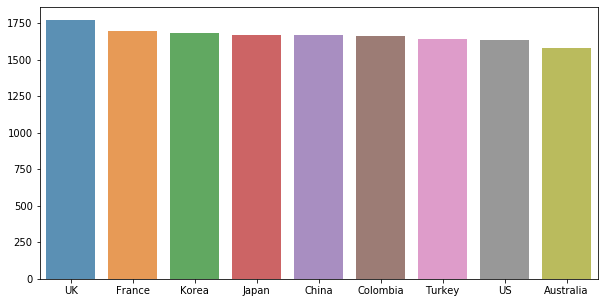

In [91]:
# countries from where the data was collected
count = df['GEO'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(count.index, count.values, alpha=0.8)
plt.show()

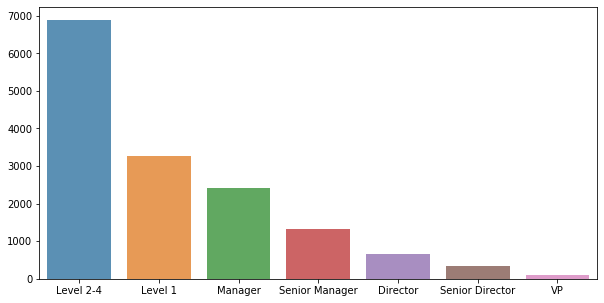

In [93]:
# roles 
count = df.Role.value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(count.index, count.values, alpha=0.8)
plt.show()

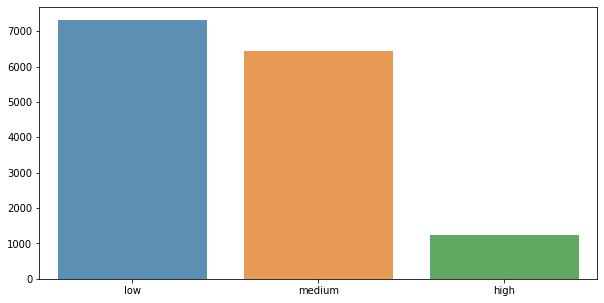

In [92]:
# 3 categories in salary
count = df.salary.value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(count.index, count.values, alpha=0.8)
plt.show()

Most people have a low income and we can see there are very few people in the dataset that have very high managing position.

In [86]:
df.Gender.value_counts('F')

F    0.506434
M    0.493566
Name: Gender, dtype: float64

In [94]:
counts = df.groupby(['Gender', 'salary']).count()
counts

ID  Name  Department   GEO  Role  Rising_Star  Will_Relocate  \
Gender salary                                                                   
F      high     613   613         613   613   613            0            613   
       low     3684  3683        3684  3684  3684            6           3684   
       medium  3299  3299        3299  3299  3299            4           3299   
M      high     624   624         624   624   624            2            624   
       low     3632  3631        3632  3632  3632            7           3632   
       medium  3147  3147        3147  3147  3147            2           3147   

               Critical  Trending Perf  Talent_Level  ...  Emp_Competitive_5  \
Gender salary                                         ...                      
F      high          17            613           613  ...                613   
       low          129           3684          3684  ...               3684   
       medium       105           3299          3299  ...               3299   
M      high          14            624           624  ...                624   
       low          129           3632          3632  ...               3632   
       medium        86           3147          3147  ...               3147   

               Emp_Collaborative_1  Emp_Collaborative_2  Emp_Collaborative_3  \
Gender salary                                                                  
F      high                    613                  613                  613   
       low                    3684                 3684                 3684   
       medium                 3299                 3299                 3299   
M      high                    624                  624                  624   
       low                    3632                 3632                 3632   
       medium                 3147                 3147                 3147   

               Emp_Collaborative_4  Emp_Collaborative_5  Sensor_StepCount  \
Gender salary                                                               
F      high                    613                  613               613   
       low                    3684                 3684              3684   
       medium                 3299                 3299              3299   
M      high                    624                  624               624   
       low                    3632                 3632              3632   
       medium                 3147                 3147              3147   

               Sensor_Heartbeat(Average/Min)  \
Gender salary                                  
F      high                              613   
       low                              3684   
       medium                           3299   
M      high                              624   
       low                              3632   
       medium                           3147   

               Sensor_Proximity(1-highest/10-lowest)  salary_category  
Gender salary                                                          
F      high                                      613              613  
       low                                      3684             3684  
       medium                                   3299             3299  
M      high                                      624              624  
       low                                      3632             3632  
       medium                                   3147             3147  

[6 rows x 61 columns]

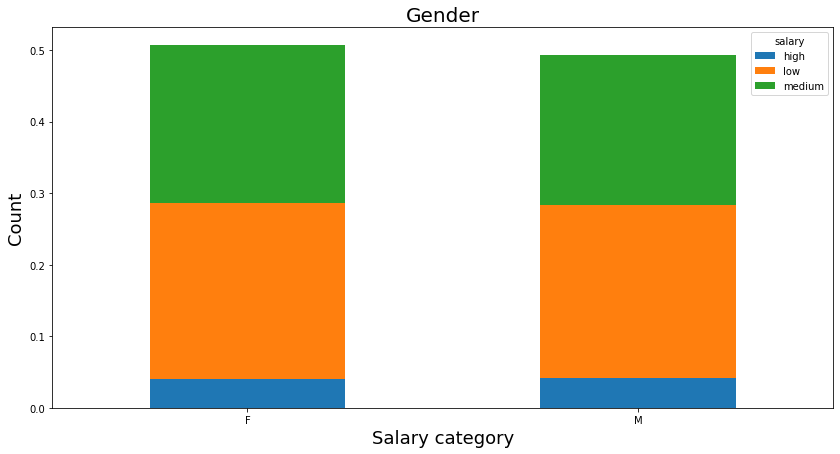

In [120]:
crosstab_eda = pd.crosstab(index=df['Gender'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df[df['salary'].isin(df['salary']\
                                                                            .value_counts()[:5].index.values)]['salary'])

crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Gender", fontsize=20) # seting the title size
plt.xlabel("Salary category", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.savefig('plot_1.png')

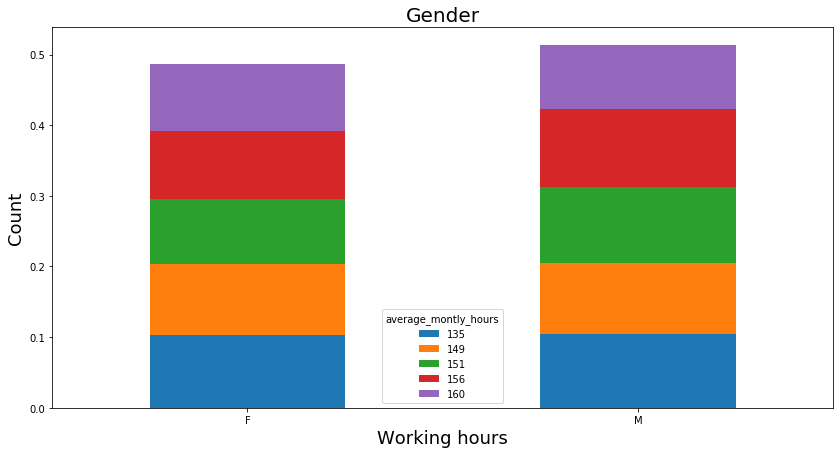

In [119]:
crosstab_eda = pd.crosstab(index=df['Gender'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df[df['average_montly_hours'].isin(df['average_montly_hours']\
                                                                            .value_counts()[:5].index.values)]['average_montly_hours'])

crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Gender", fontsize=20) # seting the title size
plt.xlabel("Working hours", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.savefig('plot_2.png')

<Figure size 432x288 with 0 Axes>

In terms of Women vs Men, they represent 50% to 49%, respectively. However, we can not see the differences in salaries within each category, the dispersion seems quite fair in the two genres. In terms of the average number of working hours, Men seem to work a bit more hours than women.

In the future, I would to dig into each variable to better draw the picture of women and men in the workplace with focus on diffreences in salary and performance.